In [1]:
# Imports needed for the script
import numpy as np
import glob
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
test = pd.read_csv (r'datasetMP2.csv')

In [3]:
test.shape

(80186, 10)

In [4]:
test.head()

,tweet_id,favourite_count,retweet_count,created_at,name,user_id,screen_name,followers_count,friends_count,user_registration
0,1463644818207219715,0,0,b'24-11-2021 23:04:52',b'DerechoUAntofagasta',68504932,b'DerechoAntof',738,123,b'24-08-2009 20:50:43'
1,1463644816906940421,0,0,b'24-11-2021 23:04:52',b'Mercedes Schoeler \xf0\x9f\x87\xa8\xf0\x9f\x...,703936663,b'erschoeler',473,592,b'18-07-2012 22:52:14'
2,1463644814423969793,0,0,b'24-11-2021 23:04:51',b'\xf0\x9d\x99\xb3\xf0\x9d\x9a\x8a\xf0\x9d\x9a...,57973050,b'Daniel0109',7823,3333,b'18-07-2009 16:42:51'
3,1463644795906125826,0,0,b'24-11-2021 23:04:47',b'Chapu \xf0\x9f\x8c\xb3',54694417,b'MatiasinRitalin',2952,2906,b'07-07-2009 22:05:17'
4,1463644787697872898,0,0,b'24-11-2021 23:04:45',b'\xef\xa3\xbfFak\xe2\x82\xacP\xc2\xa3asticP\x...,292999402,b'FakePlasticP',604,2020,b'04-05-2011 15:56:47'


In [5]:
test.sort_values(["user_registration"])

,tweet_id,favourite_count,retweet_count,created_at,name,user_id,screen_name,followers_count,friends_count,user_registration
65754,1462770091364270081,79,3,b'22-11-2021 13:09:01',b'German1312\xf0\x9f\x87\xa8\xf0\x9f\x87\xb1\x...,100873210,b'German1980',149,1420,b'01-01-2010 00:58:32'
66664,1462761403043831818,2,0,b'22-11-2021 12:34:29',b'German1312\xf0\x9f\x87\xa8\xf0\x9f\x87\xb1\x...,100873210,b'German1980',149,1420,b'01-01-2010 00:58:32'
75607,1462606666038398982,0,0,b'22-11-2021 02:19:37',b'German1312\xf0\x9f\x87\xa8\xf0\x9f\x87\xb1\x...,100873210,b'German1980',149,1420,b'01-01-2010 00:58:32'
65009,1462777373418426371,28,0,b'22-11-2021 13:37:57',b'German1312\xf0\x9f\x87\xa8\xf0\x9f\x87\xb1\x...,100873210,b'German1980',149,1420,b'01-01-2010 00:58:32'
48331,1462958564360683526,0,0,b'23-11-2021 01:37:56',b'German1312\xf0\x9f\x87\xa8\xf0\x9f\x87\xb1\x...,100873210,b'German1980',149,1420,b'01-01-2010 00:58:32'
...,...,...,...,...,...,...,...,...,...,...
30110,1463243180673961988,1,0,b'23-11-2021 20:28:54',b'Jonathan\xf0\x9f\xa4\x98\xf0\x9f\x8f\xbc\xf0...,2953197551,b'__Joni7',179,134,b'31-12-2014 14:36:05'
17833,1463408096064200704,0,1,b'24-11-2021 07:24:13',b'David Calderon',815042945862799360,b'CalderDavid11',84,1317,b'31-12-2016 03:52:35'
17841,1463407178161733634,0,0,b'24-11-2021 07:20:34',b'David Calderon',815042945862799360,b'CalderDavid11',84,1317,b'31-12-2016 03:52:35'
53814,1462905012984635395,12,3,b'22-11-2021 22:05:09',b'Priscila Betzab\xc3\xa9',1344460518103384065,b'Priscibet',183,180,b'31-12-2020 01:49:40'


<BarContainer object of 9438 artists>

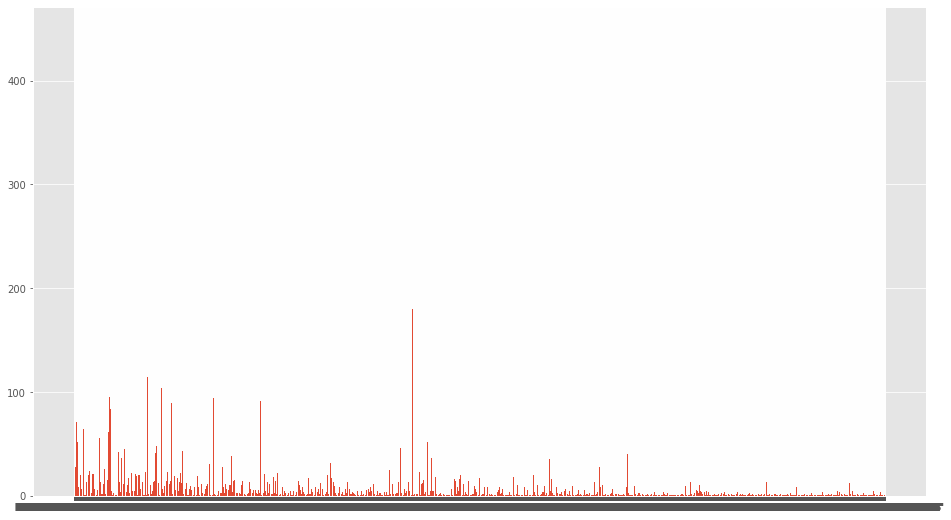

In [48]:
f1 = test.groupby('user_registration').mean()
ocurrencies = {}
for index, row in test.iterrows():
    if row['user_registration'] in ocurrencies:
        ocurrencies[row['user_registration']] += 1
    else:
        ocurrencies[row['user_registration']] = 1

plt.bar(ocurrencies.keys(), ocurrencies.values())

In [8]:
x = np.arange(0,100,2)
print(x)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94
 96 98]
